In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt ## seaborn 보다 고급 시각화 가능. but 코드 복잡
import seaborn as sns           ## seaborn은 matplotlib보다 간단하게 사용 가능

In [15]:
train = pd.read_csv("./data/santander/train.csv")
test = pd.read_csv("./data/santander/test.csv")
sub = pd.read_csv("./data/santander/sample_submission.csv")

train.shape, test.shape, sub.shape

((76020, 371), (75818, 370), (75818, 2))

In [16]:
train

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,151829,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,151830,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,151835,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,151836,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [17]:
test

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.100000
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.720000
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.950000
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.610000
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.730000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75813,151831,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40243.200000
75814,151832,2,26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146961.300000
75815,151833,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,167299.770000
75816,151834,2,40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Columns: 370 entries, ID to var38
dtypes: float64(110), int64(260)
memory usage: 214.0 MB


In [18]:
sub

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0
...,...,...
75813,151831,0
75814,151832,0
75815,151833,0
75816,151834,0


In [21]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75818 entries, 0 to 75817
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      75818 non-null  int64
 1   TARGET  75818 non-null  int64
dtypes: int64(2)
memory usage: 1.2 MB


<AxesSubplot:xlabel='TARGET', ylabel='count'>

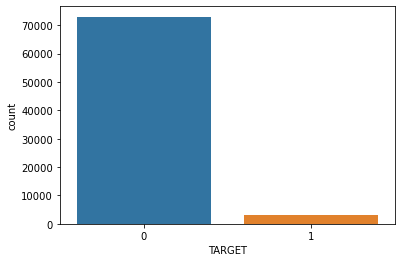

In [22]:
sns.countplot(x="TARGET", data=train)

In [23]:
train['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [25]:
type(train['TARGET'].value_counts())

pandas.core.series.Series

In [24]:
unsatified = train['TARGET'].value_counts()[1]
unsatified / train['TARGET'].count()  # 비율

0.0395685345961589

In [26]:
train.isnull().sum()

ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64

In [28]:
train.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [30]:
train['var3'].value_counts()

 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: var3, Length: 208, dtype: int64

In [32]:
train['var3'].replace(-999999, 2, inplace=True)

In [33]:
train = train.loc[:, 'var3':]

In [34]:
train

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76015,2,48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60926.490000,0
76016,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,118634.520000,0
76017,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74028.150000,0
76018,2,25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,84278.160000,0


In [35]:
summary = train.describe()
type(summary)

print( summary.loc["min", :].min(), summary.loc["min", :].max() )
print( summary.loc["max", :].min(), summary.loc["max", :].max() )
print( summary.loc["count", :].min(), summary.loc["count", :].max() )
print( summary.loc["mean", :].min(), summary.loc["mean", :].max() )

-4942.26 5163.75
0.0 9999999999.0
76020.0 76020.0
0.0 48671402.235872336


In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = train.iloc[:, :-1]
y = train['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
## 레이블 분포비율
print( "학습용 레이블 분포 비율 : \n" , y_train.value_counts() / y_train.count() )
print( "테스트용 레이블 분포 비율 : \n" , y_train.value_counts() / y_train.count() )

학습용 레이블 분포 비율 : 
 0    0.960964
1    0.039036
Name: TARGET, dtype: float64
테스트용 레이블 분포 비율 : 
 0    0.960964
1    0.039036
Name: TARGET, dtype: float64


In [45]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

In [41]:
xgb_model = XGBClassifier(n_estimators=500, random_state=156)

In [42]:
xgb_model.fit(X_train, y_train, early_stopping_rounds=100,
              eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

C:\Users\Administrator\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85831	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88238	validation_1-auc:0.84101
[17]	validation_0-auc:0.88354	validation_1-auc:0.84071
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=156,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
pred_prob = xgb_model.predict_proba(X_test)[:, 1]
pred_prob

array([0.00643863, 0.02387667, 0.01260844, ..., 0.05883254, 0.01729385,
       0.01727541], dtype=float32)

In [46]:
xgb_roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print("ROC AUC : {0:.4f}".format(xgb_roc_score))

ROC AUC : 0.8413


In [47]:
%%time

from sklearn.model_selection import GridSearchCV

# 우선 하이퍼 파라미터 수행 속도를 향상을 위해 100으로
xgb_model1 = XGBClassifier(n_estimators=100, use_label_encoder=False)
params = {"max_depth":[5,7],
          "min_child_weight":[1,3],
          "colsample_bytree":[0.5, 0.75]}

gridcv = GridSearchCV(xgb_model1, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, 
            eval_metric='auc', 
            eval_set = [(X_train, y_train), (X_test, y_test)])

[0]	validation_0-auc:0.79161	validation_1-auc:0.79321
[1]	validation_0-auc:0.81865	validation_1-auc:0.81375
[2]	validation_0-auc:0.82586	validation_1-auc:0.81846
[3]	validation_0-auc:0.82789	validation_1-auc:0.82226
[4]	validation_0-auc:0.83249	validation_1-auc:0.82677
[5]	validation_0-auc:0.83477	validation_1-auc:0.83225
[6]	validation_0-auc:0.83340	validation_1-auc:0.82654
[7]	validation_0-auc:0.84223	validation_1-auc:0.83486
[8]	validation_0-auc:0.84586	validation_1-auc:0.83682
[9]	validation_0-auc:0.84557	validation_1-auc:0.83472
[10]	validation_0-auc:0.84423	validation_1-auc:0.83181
[11]	validation_0-auc:0.84428	validation_1-auc:0.82920
[12]	validation_0-auc:0.85176	validation_1-auc:0.83433
[13]	validation_0-auc:0.85540	validation_1-auc:0.83565
[14]	validation_0-auc:0.85718	validation_1-auc:0.83696
[15]	validation_0-auc:0.85851	validation_1-auc:0.83561
[16]	validation_0-auc:0.85964	validation_1-auc:0.83578
[17]	validation_0-auc:0.86091	validation_1-auc:0.83570
[18]	validation_0-au

[57]	validation_0-auc:0.88157	validation_1-auc:0.83860
[58]	validation_0-auc:0.88178	validation_1-auc:0.83810
[59]	validation_0-auc:0.88186	validation_1-auc:0.83774
[0]	validation_0-auc:0.79210	validation_1-auc:0.79292
[1]	validation_0-auc:0.81759	validation_1-auc:0.81404
[2]	validation_0-auc:0.82567	validation_1-auc:0.81864
[3]	validation_0-auc:0.82819	validation_1-auc:0.82244
[4]	validation_0-auc:0.83233	validation_1-auc:0.82618
[5]	validation_0-auc:0.83480	validation_1-auc:0.83163
[6]	validation_0-auc:0.83342	validation_1-auc:0.82840
[7]	validation_0-auc:0.84265	validation_1-auc:0.83512
[8]	validation_0-auc:0.84614	validation_1-auc:0.83742
[9]	validation_0-auc:0.84573	validation_1-auc:0.83475
[10]	validation_0-auc:0.84426	validation_1-auc:0.83066
[11]	validation_0-auc:0.84358	validation_1-auc:0.82937
[12]	validation_0-auc:0.85089	validation_1-auc:0.83491
[13]	validation_0-auc:0.85457	validation_1-auc:0.83785
[14]	validation_0-auc:0.85645	validation_1-auc:0.83894
[15]	validation_0-au

[52]	validation_0-auc:0.87646	validation_1-auc:0.84097
[0]	validation_0-auc:0.80843	validation_1-auc:0.80885
[1]	validation_0-auc:0.82920	validation_1-auc:0.82211
[2]	validation_0-auc:0.83320	validation_1-auc:0.82400
[3]	validation_0-auc:0.83625	validation_1-auc:0.82577
[4]	validation_0-auc:0.84188	validation_1-auc:0.82897
[5]	validation_0-auc:0.84455	validation_1-auc:0.83377
[6]	validation_0-auc:0.84503	validation_1-auc:0.82916
[7]	validation_0-auc:0.85319	validation_1-auc:0.83364
[8]	validation_0-auc:0.85976	validation_1-auc:0.83390
[9]	validation_0-auc:0.85952	validation_1-auc:0.82834
[10]	validation_0-auc:0.85919	validation_1-auc:0.82378
[11]	validation_0-auc:0.85956	validation_1-auc:0.82400
[12]	validation_0-auc:0.86574	validation_1-auc:0.82888
[13]	validation_0-auc:0.87027	validation_1-auc:0.83251
[14]	validation_0-auc:0.87240	validation_1-auc:0.83311
[15]	validation_0-auc:0.87365	validation_1-auc:0.83080
[16]	validation_0-auc:0.87567	validation_1-auc:0.83134
[17]	validation_0-au

[20]	validation_0-auc:0.87498	validation_1-auc:0.83267
[21]	validation_0-auc:0.87527	validation_1-auc:0.83259
[22]	validation_0-auc:0.87572	validation_1-auc:0.83274
[23]	validation_0-auc:0.87659	validation_1-auc:0.83362
[24]	validation_0-auc:0.87704	validation_1-auc:0.83315
[25]	validation_0-auc:0.87743	validation_1-auc:0.83338
[26]	validation_0-auc:0.87762	validation_1-auc:0.83358
[27]	validation_0-auc:0.87818	validation_1-auc:0.83337
[28]	validation_0-auc:0.87822	validation_1-auc:0.83346
[29]	validation_0-auc:0.87890	validation_1-auc:0.83331
[30]	validation_0-auc:0.87903	validation_1-auc:0.83315
[31]	validation_0-auc:0.87993	validation_1-auc:0.83277
[32]	validation_0-auc:0.88063	validation_1-auc:0.83284
[33]	validation_0-auc:0.88096	validation_1-auc:0.83339
[34]	validation_0-auc:0.88210	validation_1-auc:0.83309
[35]	validation_0-auc:0.88207	validation_1-auc:0.83317
[36]	validation_0-auc:0.88224	validation_1-auc:0.83314
[37]	validation_0-auc:0.88240	validation_1-auc:0.83292
[38]	valid

[43]	validation_0-auc:0.87846	validation_1-auc:0.83286
[0]	validation_0-auc:0.80863	validation_1-auc:0.80010
[1]	validation_0-auc:0.82349	validation_1-auc:0.81717
[2]	validation_0-auc:0.82654	validation_1-auc:0.81737
[3]	validation_0-auc:0.82988	validation_1-auc:0.82281
[4]	validation_0-auc:0.83570	validation_1-auc:0.82554
[5]	validation_0-auc:0.83917	validation_1-auc:0.82930
[6]	validation_0-auc:0.84492	validation_1-auc:0.83396
[7]	validation_0-auc:0.84657	validation_1-auc:0.83569
[8]	validation_0-auc:0.84837	validation_1-auc:0.83476
[9]	validation_0-auc:0.85010	validation_1-auc:0.83841
[10]	validation_0-auc:0.85017	validation_1-auc:0.83887
[11]	validation_0-auc:0.85091	validation_1-auc:0.83723
[12]	validation_0-auc:0.85584	validation_1-auc:0.83976
[13]	validation_0-auc:0.85900	validation_1-auc:0.84063
[14]	validation_0-auc:0.86059	validation_1-auc:0.84054
[15]	validation_0-auc:0.86167	validation_1-auc:0.84086
[16]	validation_0-auc:0.86303	validation_1-auc:0.84085
[17]	validation_0-au

[13]	validation_0-auc:0.85817	validation_1-auc:0.84131
[14]	validation_0-auc:0.85945	validation_1-auc:0.84041
[15]	validation_0-auc:0.86040	validation_1-auc:0.83984
[16]	validation_0-auc:0.86127	validation_1-auc:0.83954
[17]	validation_0-auc:0.86170	validation_1-auc:0.83947
[18]	validation_0-auc:0.86276	validation_1-auc:0.83945
[19]	validation_0-auc:0.86327	validation_1-auc:0.84019
[20]	validation_0-auc:0.86381	validation_1-auc:0.84075
[21]	validation_0-auc:0.86454	validation_1-auc:0.84078
[22]	validation_0-auc:0.86530	validation_1-auc:0.84164
[23]	validation_0-auc:0.86598	validation_1-auc:0.84128
[24]	validation_0-auc:0.86656	validation_1-auc:0.84078
[25]	validation_0-auc:0.86721	validation_1-auc:0.84069
[26]	validation_0-auc:0.86745	validation_1-auc:0.84066
[27]	validation_0-auc:0.86808	validation_1-auc:0.84017
[28]	validation_0-auc:0.86914	validation_1-auc:0.84027
[29]	validation_0-auc:0.86951	validation_1-auc:0.84014
[30]	validation_0-auc:0.86972	validation_1-auc:0.84016
[31]	valid

[22]	validation_0-auc:0.88868	validation_1-auc:0.83811
[23]	validation_0-auc:0.88983	validation_1-auc:0.83780
[24]	validation_0-auc:0.89034	validation_1-auc:0.83731
[25]	validation_0-auc:0.89095	validation_1-auc:0.83717
[26]	validation_0-auc:0.89144	validation_1-auc:0.83694
[27]	validation_0-auc:0.89201	validation_1-auc:0.83660
[28]	validation_0-auc:0.89275	validation_1-auc:0.83711
[29]	validation_0-auc:0.89285	validation_1-auc:0.83771
[30]	validation_0-auc:0.89306	validation_1-auc:0.83717
[31]	validation_0-auc:0.89335	validation_1-auc:0.83704
[32]	validation_0-auc:0.89410	validation_1-auc:0.83731
[33]	validation_0-auc:0.89482	validation_1-auc:0.83674
[34]	validation_0-auc:0.89587	validation_1-auc:0.83723
[35]	validation_0-auc:0.89607	validation_1-auc:0.83724
[36]	validation_0-auc:0.89652	validation_1-auc:0.83646
[37]	validation_0-auc:0.89677	validation_1-auc:0.83664
[38]	validation_0-auc:0.89692	validation_1-auc:0.83654
[39]	validation_0-auc:0.89734	validation_1-auc:0.83618
[40]	valid

[37]	validation_0-auc:0.88852	validation_1-auc:0.83840
[38]	validation_0-auc:0.88964	validation_1-auc:0.83815
[0]	validation_0-auc:0.82297	validation_1-auc:0.81707
[1]	validation_0-auc:0.83141	validation_1-auc:0.82133
[2]	validation_0-auc:0.83805	validation_1-auc:0.82785
[3]	validation_0-auc:0.84271	validation_1-auc:0.82901
[4]	validation_0-auc:0.84766	validation_1-auc:0.83398
[5]	validation_0-auc:0.85126	validation_1-auc:0.83381
[6]	validation_0-auc:0.85486	validation_1-auc:0.83360
[7]	validation_0-auc:0.85943	validation_1-auc:0.83287
[8]	validation_0-auc:0.86243	validation_1-auc:0.83187
[9]	validation_0-auc:0.86500	validation_1-auc:0.83304
[10]	validation_0-auc:0.86496	validation_1-auc:0.83318
[11]	validation_0-auc:0.86466	validation_1-auc:0.83180
[12]	validation_0-auc:0.87014	validation_1-auc:0.83453
[13]	validation_0-auc:0.87320	validation_1-auc:0.83548
[14]	validation_0-auc:0.87478	validation_1-auc:0.83833
[15]	validation_0-auc:0.87618	validation_1-auc:0.83862
[16]	validation_0-au

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [49]:
print("GridSearchCV  최적 파라미터 : ", gridcv.best_params_ )

pred_prob = gridcv.predict_proba(X_test)[:, 1]
xgb_roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print("ROC AUC : {0:4f}".format(xgb_roc_score))

GridSearchCV  최적 파라미터 :  {'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 3}
ROC AUC : 0.844455


In [50]:
%%time

xgb_model_l = XGBClassifier(n_estimators=1000,
                            random_state= 77, 
                            learning_rate=0.02,
                            max_depth=5,
                            min_child_weight=3,
                            colsample_bytree=0.5, 
                            reg_alpha=0.03)

# 성능 평가 지표를 auc로, 조기 중단 파라미터 값은 200으로 설정하고 학습 수행
xgb_model_l.fit(X_train, y_train, early_stopping_rounds=200,
              eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

C:\Users\Administrator\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.71704	validation_1-auc:0.71652
[1]	validation_0-auc:0.74880	validation_1-auc:0.74950
[2]	validation_0-auc:0.80419	validation_1-auc:0.80604
[3]	validation_0-auc:0.81857	validation_1-auc:0.82137
[4]	validation_0-auc:0.81688	validation_1-auc:0.81994
[5]	validation_0-auc:0.81520	validation_1-auc:0.81725
[6]	validation_0-auc:0.81233	validation_1-auc:0.81439
[7]	validation_0-auc:0.81679	validation_1-auc:0.82061
[8]	validation_0-auc:0.82137	validation_1-auc:0.82476
[9]	validation_0-auc:0.81892	validation_1-auc:0.82203
[10]	validation_0-auc:0.81739	validation_1-auc:0.82076
[11]	validation_0-auc:0.81695	validation_1-auc:0.81954
[12]	validation_0-auc:0.81554	validation_1-auc:0.81830
[13]	validation_0-auc:0.81406	validation_1-auc:0.81690
[14]	validation_0-auc:0.81343	validation_1-auc:0.81583
[15]	validation_0-auc:0.81383	validation_1-auc:0.81518
[16]	validation_0-auc:0.81743	validation_1-auc:0.81833
[17]	validation_0-auc:0.81998	validation_1-auc:0.82008
[18]	validation_0-au

[149]	validation_0-auc:0.85038	validation_1-auc:0.83825
[150]	validation_0-auc:0.85043	validation_1-auc:0.83822
[151]	validation_0-auc:0.85065	validation_1-auc:0.83857
[152]	validation_0-auc:0.85098	validation_1-auc:0.83900
[153]	validation_0-auc:0.85086	validation_1-auc:0.83894
[154]	validation_0-auc:0.85101	validation_1-auc:0.83878
[155]	validation_0-auc:0.85096	validation_1-auc:0.83855
[156]	validation_0-auc:0.85130	validation_1-auc:0.83893
[157]	validation_0-auc:0.85182	validation_1-auc:0.83911
[158]	validation_0-auc:0.85184	validation_1-auc:0.83915
[159]	validation_0-auc:0.85170	validation_1-auc:0.83904
[160]	validation_0-auc:0.85237	validation_1-auc:0.83933
[161]	validation_0-auc:0.85284	validation_1-auc:0.83943
[162]	validation_0-auc:0.85292	validation_1-auc:0.83936
[163]	validation_0-auc:0.85298	validation_1-auc:0.83942
[164]	validation_0-auc:0.85292	validation_1-auc:0.83933
[165]	validation_0-auc:0.85298	validation_1-auc:0.83911
[166]	validation_0-auc:0.85354	validation_1-auc:

[296]	validation_0-auc:0.87043	validation_1-auc:0.84503
[297]	validation_0-auc:0.87050	validation_1-auc:0.84502
[298]	validation_0-auc:0.87057	validation_1-auc:0.84503
[299]	validation_0-auc:0.87069	validation_1-auc:0.84503
[300]	validation_0-auc:0.87080	validation_1-auc:0.84513
[301]	validation_0-auc:0.87089	validation_1-auc:0.84511
[302]	validation_0-auc:0.87092	validation_1-auc:0.84508
[303]	validation_0-auc:0.87105	validation_1-auc:0.84506
[304]	validation_0-auc:0.87111	validation_1-auc:0.84513
[305]	validation_0-auc:0.87123	validation_1-auc:0.84509
[306]	validation_0-auc:0.87130	validation_1-auc:0.84504
[307]	validation_0-auc:0.87142	validation_1-auc:0.84503
[308]	validation_0-auc:0.87154	validation_1-auc:0.84495
[309]	validation_0-auc:0.87162	validation_1-auc:0.84493
[310]	validation_0-auc:0.87164	validation_1-auc:0.84492
[311]	validation_0-auc:0.87170	validation_1-auc:0.84499
[312]	validation_0-auc:0.87181	validation_1-auc:0.84499
[313]	validation_0-auc:0.87191	validation_1-auc:

[443]	validation_0-auc:0.87840	validation_1-auc:0.84496
[444]	validation_0-auc:0.87842	validation_1-auc:0.84495
[445]	validation_0-auc:0.87844	validation_1-auc:0.84498
[446]	validation_0-auc:0.87846	validation_1-auc:0.84497
[447]	validation_0-auc:0.87858	validation_1-auc:0.84495
[448]	validation_0-auc:0.87862	validation_1-auc:0.84493
[449]	validation_0-auc:0.87866	validation_1-auc:0.84492
[450]	validation_0-auc:0.87868	validation_1-auc:0.84493
[451]	validation_0-auc:0.87870	validation_1-auc:0.84494
[452]	validation_0-auc:0.87874	validation_1-auc:0.84494
[453]	validation_0-auc:0.87884	validation_1-auc:0.84493
[454]	validation_0-auc:0.87892	validation_1-auc:0.84495
[455]	validation_0-auc:0.87893	validation_1-auc:0.84493
[456]	validation_0-auc:0.87898	validation_1-auc:0.84495
[457]	validation_0-auc:0.87904	validation_1-auc:0.84496
[458]	validation_0-auc:0.87908	validation_1-auc:0.84497
[459]	validation_0-auc:0.87909	validation_1-auc:0.84497
[460]	validation_0-auc:0.87912	validation_1-auc:

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=12, num_parallel_tree=1,
              predictor='auto', random_state=77, reg_alpha=0.03, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [51]:
pred_prob = xgb_model_l.predict_proba(X_test)[:, 1]
xgb_roc_score = roc_auc_score(y_test, pred_prob, average='macro')
print("ROC AUC : {0:4f}".format(xgb_roc_score))

ROC AUC : 0.845269


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

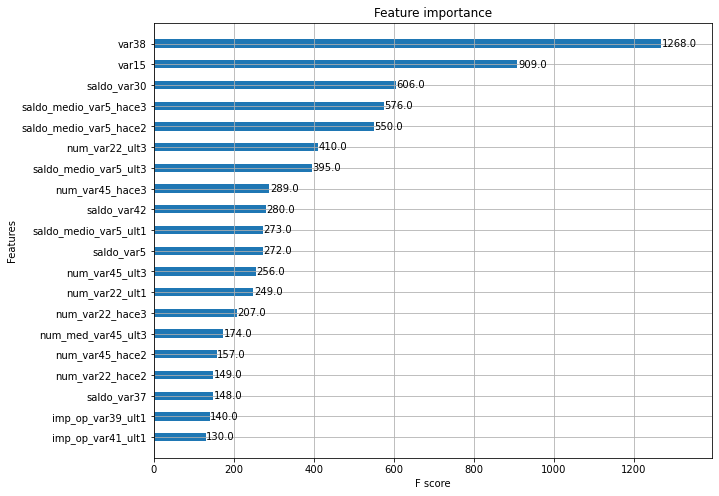

In [52]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10,8))
plot_importance(xgb_model_l, ax=ax, max_num_features=20, height=0.4)